In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Use only the training images
)

validation_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Training",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # Use only the validation images
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [4]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

In [5]:
IMAGE_SIZE = [224, 224]

In [6]:
resnet=ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [7]:
for layer in resnet.layers:
    layer.trainable = False

x = Flatten()(resnet.output)

prediction = Dense(4, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
history=model.fit(
    train_generator,
     batch_size=32,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/20
143/143 [==============================] - 53s 296ms/step - loss: 1.3904 - accuracy: 0.6434 - val_loss: 0.9585 - val_accuracy: 0.6687
Epoch 2/20
143/143 [==============================] - 27s 188ms/step - loss: 0.5875 - accuracy: 0.7777 - val_loss: 1.0772 - val_accuracy: 0.6529
Epoch 3/20
143/143 [==============================] - 27s 188ms/step - loss: 0.6992 - accuracy: 0.7631 - val_loss: 1.0045 - val_accuracy: 0.7239
Epoch 4/20
143/143 [==============================] - 27s 190ms/step - loss: 0.5526 - accuracy: 0.8046 - val_loss: 1.7176 - val_accuracy: 0.6941
Epoch 5/20
143/143 [==============================] - 27s 187ms/step - loss: 0.4175 - accuracy: 0.8377 - val_loss: 0.8760 - val_accuracy: 0.7616
Epoch 6/20
143/143 [==============================] - 26s 180ms/step - loss: 0.4347 - accuracy: 0.8344 - val_loss: 1.0405 - val_accuracy: 0.6713
Epoch 7/20
143/143 [==============================] - 26s 181ms/step - loss: 0.5150 - accuracy: 0.8213 - val_loss: 1.0279 - val_ac

Training Accuracy :  0.8391270995140075
Validation Accuracy :  0.7260298043489456


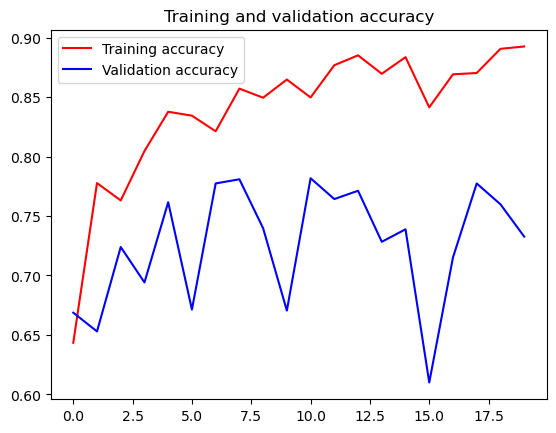

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
acc = history.history['accuracy']
print("Training Accuracy : ",mean(acc))
val_acc = history.history['val_accuracy']
print("Validation Accuracy : ",mean(val_acc))
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

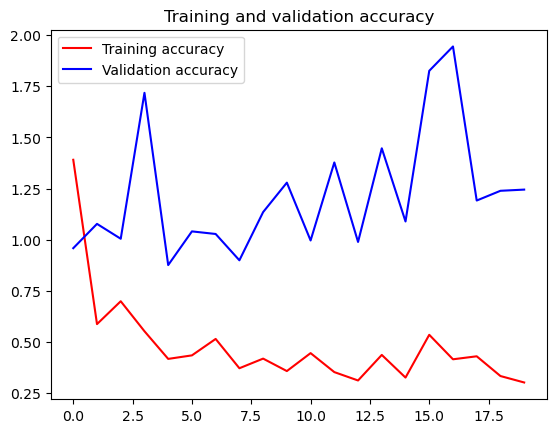

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [12]:
test_generator = datagen.flow_from_directory(
    directory=r"/kaggle/input/brain-tumor-mri-dataset/Testing",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training' # Use only the testing images
)
model.evaluate(test_generator)

Found 1049 images belonging to 4 classes.
33/33 [==============================] - 7s 218ms/step - loss: 0.4194 - accuracy: 0.8541


[0.4193818271160126, 0.8541467785835266]